In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

mouse_drug_data.columns



Index(['Mouse ID', 'Drug'], dtype='object')

In [2]:
clinical_data.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [3]:
# Combine the data into a single dataset
clinical_data_complete=pd.merge(clinical_data,mouse_drug_data, how="left", on=["Mouse ID","Mouse ID"])
# Display the data table for preview
clinical_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data=clinical_data_complete.groupby(["Drug", "Timepoint"])
avgTumorVolume=grouped_data.mean()["Tumor Volume (mm3)"]

# Convert to DataFrame

avg_tumor_response_df=pd.DataFrame(avgTumorVolume)
# Preview DataFrame
avg_tumor_response_df= avgTumorVolume.reset_index()
avg_tumor_response_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#note for self: GroupBy.sem(self, ddof=1)[source].
SE_Tumor_Volume = grouped_data.sem()["Tumor Volume (mm3)"]

#Compute standard error of the mean of groups, excluding missing values.

# Convert to DataFrame
se_tumer_responce_df= pd.DataFrame(SE_Tumor_Volume)
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumer_responce_df= se_tumer_responce_df.reset_index()
# Preview DataFrame
se_tumer_responce_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_munged_df= avg_tumor_response_df.pivot(index='Timepoint', columns='Drug', values= 'Tumor Volume (mm3)')

# Preview that Reformatting worked
avg_tumor_munged_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


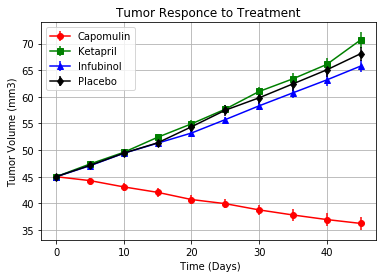

In [16]:
# Generate the Plot (with Error Bars)
fig, ax=plt.subplots() 
x_axis= avg_tumor_munged_df.index.values

# compomulin plot
y_axis= avg_tumor_munged_df.Capomulin.values
standard_errors= se_tumer_responce_df[se_tumer_responce_df.Drug== 'Capomulin']['Tumor Volume (mm3)'].values

ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Capomulin', color='red',linestyle='solid')

# Ketapril Plot
y_axis= avg_tumor_munged_df.Ketapril.values

standard_errors= se_tumer_responce_df[se_tumer_responce_df.Drug== 'Ketapril']['Tumor Volume (mm3)'].values

ax.errorbar(x_axis, y_axis, standard_errors, fmt="s", label='Ketapril', color='green',linestyle='solid')

#Infubinol Plot
y_axis= avg_tumor_munged_df.Infubinol.values

standard_errors= se_tumer_responce_df[se_tumer_responce_df.Drug== 'Infubinol']['Tumor Volume (mm3)'].values

ax.errorbar(x_axis, y_axis, standard_errors, fmt="^", label='Infubinol', color='blue',linestyle='solid')

#Placebo plot 

y_axis= avg_tumor_munged_df.Placebo.values

standard_errors= se_tumer_responce_df[se_tumer_responce_df.Drug== 'Placebo']['Tumor Volume (mm3)'].values

ax.errorbar(x_axis, y_axis, standard_errors, fmt="d", label='Placebo', color='black',linestyle='solid')


#insert Labels 
plt.title("Tumor Responce to Treatment")
plt.xlabel(" Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='topleft')
plt.grid()

# Save the Figure
plt.savefig("plots/Tumor_Response_to_Treatment.png")
plt.show()



In [83]:
# Generate the Plot (with Error Bars)
#fig, ax = plt.subplots(figsize=(10,6))
#x_axis = avg_tumor_munged_df.index.values
#markers = ['o', '+', '^', 's', 'v', 'd', 'x', '<', '>', '*']
#colors = ['red', 'cyan', 'blue', 'green', 'magenta', 'black', 'yellow', 'brown', 'grey', 'limegreen']

# Loops through drugs to plot
#i = 0
#for drug in avg_tumor_munged_df.columns:
    #y_axis = avg_tumor_munged_df[drug].values
    #standard_errors = se_tumer_responce_df[se_tumer_responce_df.Drug == drug]['Tumor Volume (mm3)'].values
    #ax.errorbar(x_axis, y_axis, standard_errors, label=drug, linestyle='solid', marker=markers[i], color=colors[i])
   # i += 1

# Labels
#plt.title("Tumor Response to Treatment")
#plt.xlabel("Time (Days)")
#plt.ylabel("Tumor Volume (mm3)")
#plt.legend(loc='best')
#plt.grid()

# Save the Figure
#plt.savefig("plots/Tumor_Response_to_Treatment_Full.png")

## Metastatic Response to Treatment

In [27]:

#avg_tumor_response_df.head()

In [28]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#clinical_data_complete.head()
avgMetaResponse= grouped_data.mean()['Metastatic Sites']

# Convert to DataFrame
avg_meta_response_df= pd.DataFrame(avgMetaResponse)
# Preview DataFrame
avg_meta_response_df=avg_meta_response_df.reset_index()
avg_meta_response_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [38]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
seMetaSite= grouped_data.sem()['Metastatic Sites']
# Convert to DataFrame
se_meta_response_df = pd.DataFrame(seMetaSite)

# Preview DataFrame

se_meta_response_df= se_meta_response_df.reset_index()
se_meta_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [48]:
# Minor Data Munging to Re-Format the Data Frames

avg_meta_munged_df= avg_meta_response_df.pivot(index='Timepoint',columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked

avg_meta_munged_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


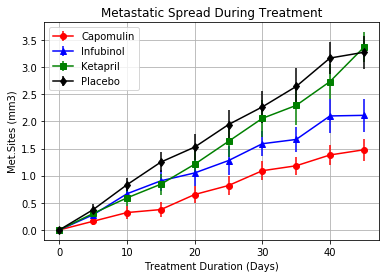

In [64]:
# Generate the Plot (with Error Bars)
fig, ax=plt.subplots()
x_axis=avg_meta_munged_df.index.values
#Capomulin Plot 
y_axis= avg_meta_munged_df.Capomulin.values
standard_errors=se_meta_response_df[se_meta_response_df.Drug== 'Capomulin']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Capomulin', color='red', linestyle='solid')

#Infubinol
y_axis= avg_meta_munged_df.Infubinol.values
standard_errors=se_meta_response_df[se_meta_response_df.Drug== 'Infubinol']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="^", label='Infubinol', color='blue', linestyle='solid')
#Ketapril
y_axis= avg_meta_munged_df.Ketapril.values
standard_errors=se_meta_response_df[se_meta_response_df.Drug== 'Ketapril']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="s", label='Ketapril', color='green', linestyle='solid')
#Placebo
y_axis= avg_meta_munged_df.Placebo.values
standard_errors=se_meta_response_df[se_meta_response_df.Drug== 'Placebo']['Metastatic Sites'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="d", label='Placebo', color='black', linestyle='solid')

#Labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met.Sites (mm3)")
plt.legend(loc='topleft')
plt.grid()

# Save the Figure
plt.savefig("plots/Metastatic_Spread_During_Treatment.png")
# Show the Figure
plt.show()


## Survival Rates

In [68]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survivalRates=grouped_data.count()['Mouse ID']
# Convert to DataFrame
survival_rates_df=pd.DataFrame(survivalRates)
# Preview DataFrame
survival_rates_df=survivalRates.reset_index()
survival_rates_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [70]:
# Minor Data Munging to Re-Format the Data Frames
survival_munged_df= survival_rates_df.pivot(index='Timepoint',columns='Drug', values= 'Mouse ID')

# Preview the Data Frame
survival_munged_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


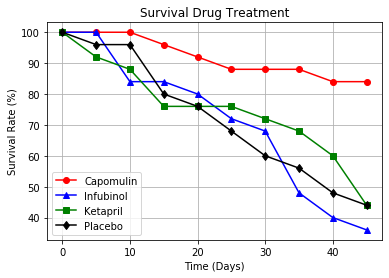

In [76]:
# Generate the Plot (Accounting for percentages)
x_axis=survival_munged_df.index.values
#Capomulin Plot 
countInitMice= survival_munged_df.Capomulin.values[0]
y_axis=survival_munged_df.Capomulin.values/countInitMice*100
plt.plot(x_axis, y_axis, marker='o', label='Capomulin', color='red')

#Infubinol
countInitMice= survival_munged_df.Infubinol.values[0]
y_axis=survival_munged_df.Infubinol.values/countInitMice*100
plt.plot(x_axis, y_axis, marker='^', label='Infubinol', color='blue')
#Ketapril
countInitMice= survival_munged_df.Ketapril.values[0]
y_axis=survival_munged_df.Ketapril.values/countInitMice*100
plt.plot(x_axis, y_axis, marker='s', label='Ketapril', color='green')
#Placebo
countInitMice= survival_munged_df.Placebo.values[0]
y_axis=survival_munged_df.Placebo.values/countInitMice*100
plt.plot(x_axis, y_axis, marker='d', label='Placebo', color='black')
#Labels
plt.title("Survival Drug Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc= 'bottomleft')
plt.grid()

# Save the Figure
plt.savefig("plots/Survival_Drug _Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [86]:

# Calculate the percent changes for each drug
avg_tumor_df = avg_tumor_response_df.drop(['Timepoint'], axis=1)
drug_grouped_df = avg_tumor_df.groupby(['Drug'])
# % = last value - first value / first value * 100
percentChanges = (drug_grouped_df['Tumor Volume (mm3)'].last() - drug_grouped_df['Tumor Volume (mm3)'].first()) / drug_grouped_df['Tumor Volume (mm3)'].first() * 100
# Display the data to confirm
percentChanges

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Tumor Volume (mm3), dtype: float64

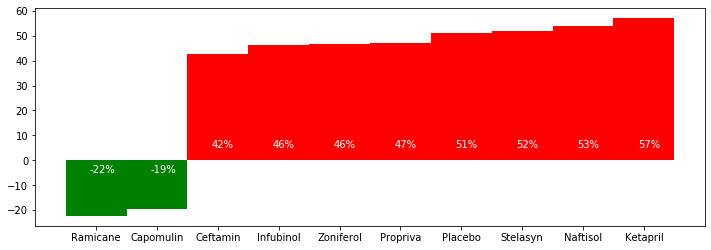

In [93]:
# Store all Relevant Percent Changes into a Tuple
percentChanges = percentChanges.sort_values(ascending=True)


# Splice the data between passing and failing drugs
failingDrug_s = percentChanges[percentChanges < 0].sort_values(ascending=True)
passingDrug_s = percentChanges[percentChanges >= 0].sort_values(ascending=True)

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(12,4))


# Use functions to label the percentages of changes

neg_ax = plt.bar(failingDrug_s.index.values, failingDrug_s.values, color='g', width=1)
pos_ax = plt.bar(passingDrug_s.index.values, passingDrug_s.values, color='r', width=1)

# Call functions to implement the function calls
# For each bar: Place a label % for negative
neg_rects = neg_ax.patches
for rect in neg_rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value)) + '%'
    plt.text(x_value-0.1, -5, percentY, color='w')

# For each bar: Place a label % for positive
pos_rects = pos_ax.patches
for rect in pos_rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value)) + '%'
    plt.text(x_value-0.1, 5, percentY, color='w')

# Save the Figure
plt.savefig("plots/Tumor_Change_Over_45_Days_Treatment.png")

# Show the Figure
fig.show()